In [1]:
!pip install split-folders

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

import splitfolders
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

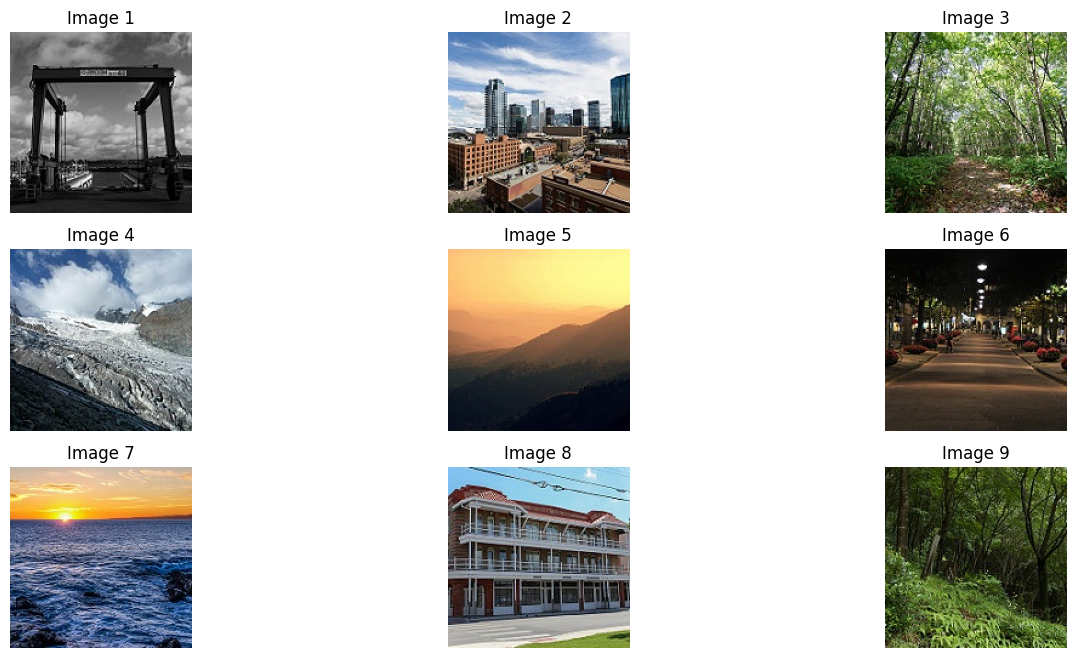

In [3]:
images = ["/content/1.jpg",
         "/content/10006.jpg",
         "/content/10010.jpg",
         "/content/10003.jpg",
         "/content/10000.jpg",
         "/content/10015.jpg",
         "/content/10071.jpg",
         "/content/1001.jpg",
         "/content/10007.jpg"]
plt.figure(figsize=(16, 8))
for i in range(9):
    img = plt.imread(images[i])
    plt.subplot(3,3, i + 1)
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis("off")

In [ ]:
splitfolders.ratio('/intel-image-classification/seg_train/seg_train', output="output", seed=1337, ratio=(0.8, 0.2))

In [4]:
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_gen = ImageDataGenerator(rescale = 1.0 / 255)

In [ ]:
train_generator = datagen.flow_from_directory(
    "/kaggle/working/output/train",
    batch_size = 32,
    target_size = (150,150),
    class_mode = "categorical"
)
validation_generator = test_gen.flow_from_directory(
    "/kaggle/working/output/val",
    batch_size = 32,
    target_size = (150,150),
    class_mode = "categorical"
)

test_generator = test_gen.flow_from_directory(
        "/kaggle/input/intel-image-classification/seg_test/seg_test",
        target_size=(150, 150),
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

In [5]:
input_size = 150
model = Sequential([
    Conv2D(input_shape=(input_size,input_size,3),filters = 32,kernel_size=(3,3),padding = 'same',activation='relu'),
    MaxPool2D(),

    Conv2D(filters= 64,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(),

    Conv2D(filters = 64,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(),

    Conv2D(filters = 128,kernel_size=(3,3),activation='relu',padding = 'same'),
    MaxPool2D(),

    Conv2D(filters = 256,kernel_size=(3,3),activation='relu',padding = 'same'),
    MaxPool2D(),

    Flatten(name='flatten'),
    Dense(6, activation = 'softmax')

])
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 64)        0

In [ ]:
plt.figure(figsize=(16, 8))
imags=["/content/20064.jpg",
      "/content/20100.jpg",
      "/content/20166.jpg",
      "/content/20109.jpg",
      "/content/20198.jpg",
       "/content/20071.jpg",
      "/content/20081.jpg",
      "/content/20070.jpg",
       "/content/20127.jpg"]
labels = {0:"buildings",1:"forest",2:"glacier",3:"mountain",4:"sea",5:"street"}
for i in range(9):
    img = image.load_img(imags[i], target_size=(150, 150))
    plt.subplot(3,3, i + 1)
    plt.imshow(img)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    predictions = model.predict(img_array)
    plt.title(f"Image of {labels[np.argmax(predictions)]}")
    plt.axis("off")